In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
import sys
sys.path.insert(0,"..")
from profiler import *
from utils import *

Available workers: 16


## Sofie wingbeats

In [46]:
wbpf = WingbeatDatasetProfiler(dsname="/home/kalfasyan/Dropbox/kuleuven/wingbeats_20211129/wingbeats_correct_dates", custom_label=[1])

Found 1356 in dataset: /home/kalfasyan/Dropbox/kuleuven/wingbeats_20211129/wingbeats_correct_dates, and 1 label(s): ['wingbeats_correct_dates']
Label(s) changed to [1]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.


In [47]:
wbpf.wbts.parse_filenames(temp_humd=True)

100%|██████████| 20/20 [00:00<00:00, 33.10it/s]


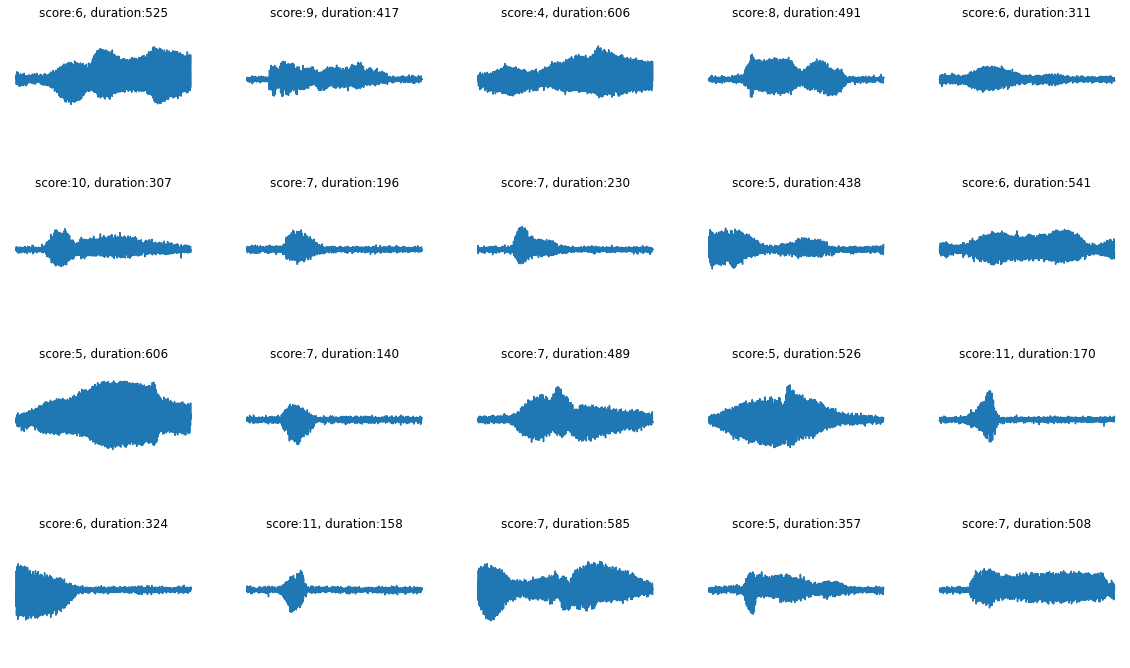

In [49]:
maxpeaks = 15
minpeaks = 1
maxscore = 12
minscore = 3.5
selection = f"peaks>{minpeaks} & peaks<{maxpeaks} & score>{minscore} & score<={maxscore}"
wbpf.df = wbpf.df.query(selection)
wbpf.plot_random_wbts()

In [50]:
from utils import *
from datasets import *
from models import *
from transforms import *
import torch.nn as nn
import torch.optim as optim
import torchaudio
from torch.utils.data import Dataset, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
torchaudio.set_audio_backend('soundfile')

batch_size_val = 32

test_df = wbpf.df
X_test, y_test = test_df.iloc[:,0], test_df.iloc[:,1]
transforms_list_test = [Bandpass(lowcut=140, highcut=1500)]
test_dataset = DataFrameset(pd.concat([X_test, y_test], axis=1), transform=transforms.Compose(transforms_list_test))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size_val, shuffle=False, num_workers=4, pin_memory=True, worker_init_fn=worker_init_fn)

optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-3, amsgrad=True)
model = DrosophilaNetRAW(outputs=2, dropout_p=.2)
model, optimizer = load_checkpoint(f'{BASE_DATACREATEDDIR}/model_best_time_signals.pth.tar', model, optimizer)
model = model.to('cuda', dtype=torch.float)
y_true, y_pred = test_model(model,test_dataloader, test_dataset)

Testing..	: 100%|██████████| 27/27 [00:00<00:00, 46.47it/s]

Accuracy: 98.81
Balanced accuracy: 98.81
Confusion matrix: 
[[0.         0.        ]
 [0.01193317 0.98806683]]



/home/kalfasyan/anaconda3/envs/wbai/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [51]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
print(f"Balanced accuracy: {balanced_accuracy_score(y_pred=y_pred, y_true=y_true)*100.:.2f}")
print(f"Confusion matrix: \n{confusion_matrix(y_pred=y_pred, y_true=y_true, normalize='true')}")

Balanced accuracy: 98.81
Confusion matrix: 
[[0.         0.        ]
 [0.01193317 0.98806683]]


/home/kalfasyan/anaconda3/envs/wbai/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [52]:
pd.Series(y_pred).value_counts()

1    828
0     10
dtype: int64

In [58]:
test_df['pred'] = y_pred
test_df['true'] = y_true

 50%|█████     | 10/20 [00:00<00:00, 25.63it/s]


IndexError: single positional indexer is out-of-bounds

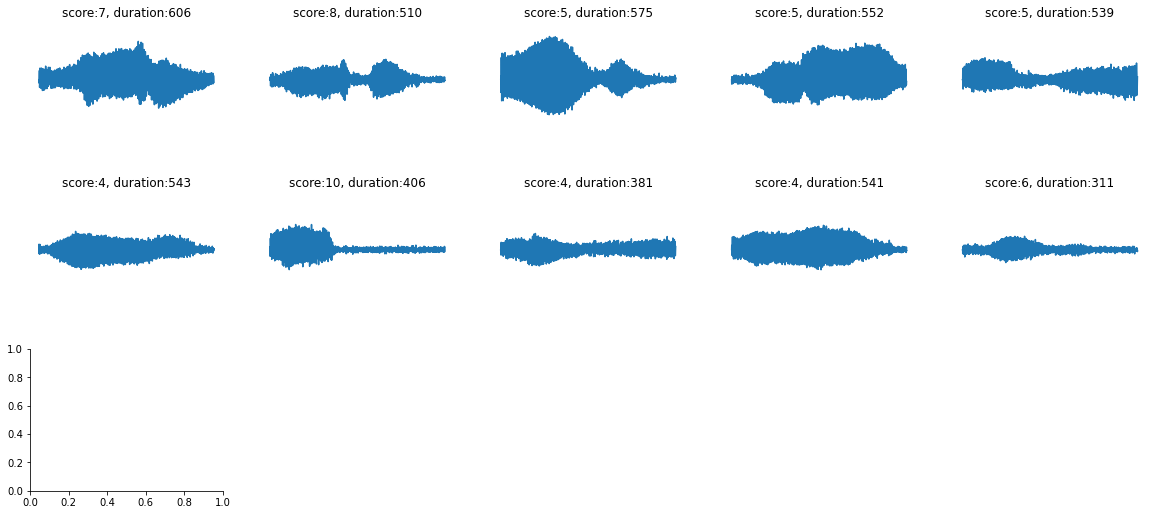

In [63]:
wbpf.plot_random_wbts(test_df[test_df.pred==0])

 50%|█████     | 10/20 [00:00<00:00, 52.03it/s]


IndexError: single positional indexer is out-of-bounds

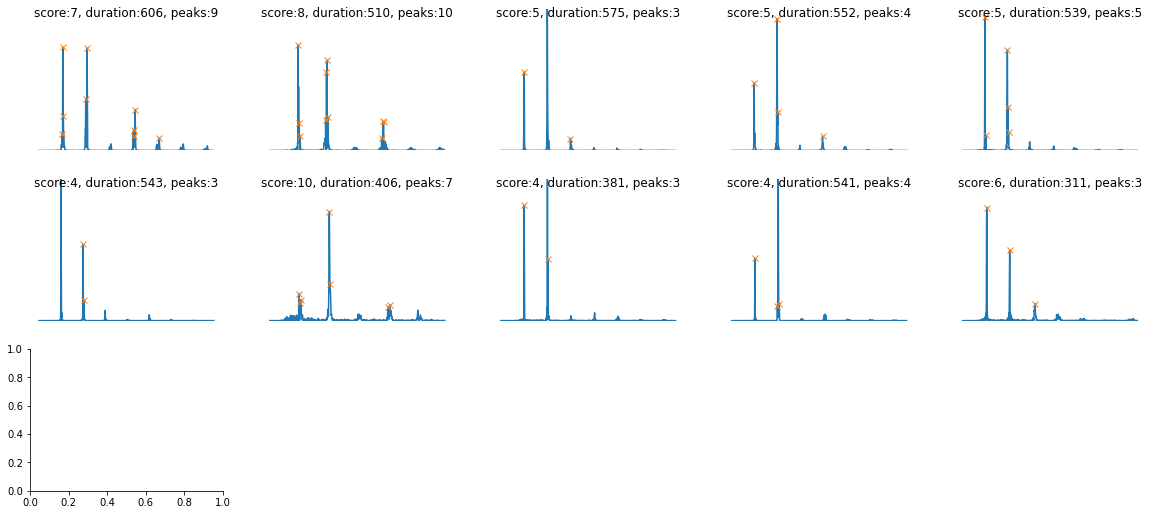

In [64]:
wbpf.plot_random_psds(test_df[test_df.pred==0])

 50%|█████     | 10/20 [00:00<00:00, 12.03it/s]


IndexError: single positional indexer is out-of-bounds

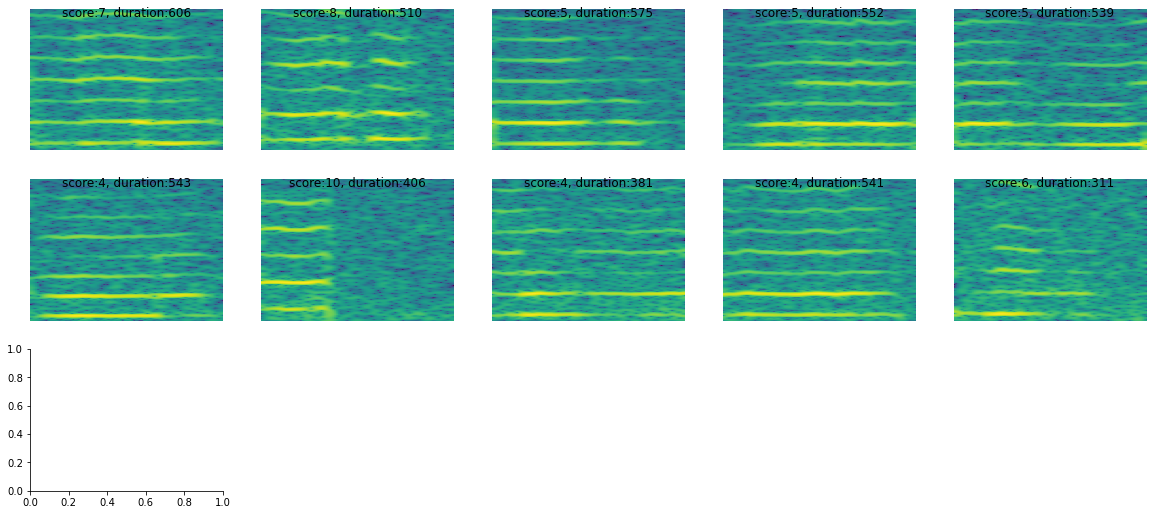

In [65]:
wbpf.plot_random_stfts(test_df[test_df.pred==0])

In [67]:
test_df[test_df.pred==0]

179   2021-11-30 09:13:02
190   2021-11-30 09:27:17
252   2021-11-30 12:11:23
322   2021-11-29 15:57:57
385   2021-11-29 15:57:58
547   2021-12-01 10:05:16
609   2021-12-01 09:48:41
751   2021-11-30 17:53:43
774   2021-11-30 17:53:44
892   2021-12-02 09:40:04
Name: date, dtype: datetime64[ns]

In [5]:
# (wbpf.wbts.df_info.humidity[wbpf.wbts.df_info.humidity>50]-50).std()

In [27]:
# %matplotlib qt
plt.figure(figsize=(20,14))
sig = wbpf.wbts[4][0].T
plt.plot(sig)

In [28]:
plt.scatter(np.linspace(0,len(sig), num=len(sig)), sig)

## Data from the Raspberry Pi

#### Free flight

Found 380 in dataset: /home/kalfasyan/Desktop/free_through/free, and 380 label(s): ['20210325_165658_Tna_Hna.wav' '20210325_170011_Tna_Hna.wav'
 '20210325_170139_Tna_Hna.wav' '20210325_170447_Tna_Hna.wav'
 '20210325_170621_Tna_Hna.wav' '20210325_170949_Tna_Hna.wav'
 '20210325_171026_Tna_Hna.wav' '20210325_171149_Tna_Hna.wav'
 '20210325_171500_Tna_Hna.wav' '20210325_172426_Tna_Hna.wav'
 '20210325_172508_Tna_Hna.wav' '20210325_172611_Tna_Hna.wav'
 '20210325_172723_Tna_Hna.wav' '20210325_172757_Tna_Hna.wav'
 '20210325_172945_Tna_Hna.wav' '20210325_173008_Tna_Hna.wav'
 '20210325_174946_Tna_Hna.wav' '20210325_175205_Tna_Hna.wav'
 '20210325_180112_Tna_Hna.wav' '20210325_181326_Tna_Hna.wav'
 '20210325_191428_Tna_Hna.wav' '20210325_191636_Tna_Hna.wav'
 '20210325_191650_Tna_Hna.wav' '20210325_191730_Tna_Hna.wav'
 '20210325_193022_Tna_Hna.wav' '20210325_193708_Tna_Hna.wav'
 '20210325_195436_Tna_Hna.wav' '20210325_195606_Tna_Hna.wav'
 '20210325_195706_Tna_Hna.wav' '20210325_200403_Tna_Hna.wav'
 '

Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.


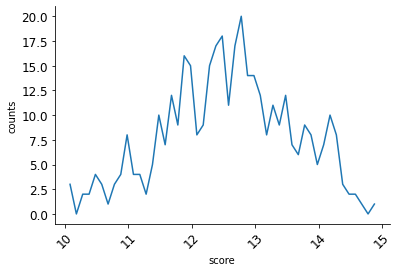

In [3]:
wbpf = WingbeatDatasetProfiler(dsname="/home/kalfasyan/Desktop/free_through/free", rpiformat=True)
np_hist(wbpf.df, 'score')

100%|██████████| 20/20 [00:00<00:00, 44.67it/s]


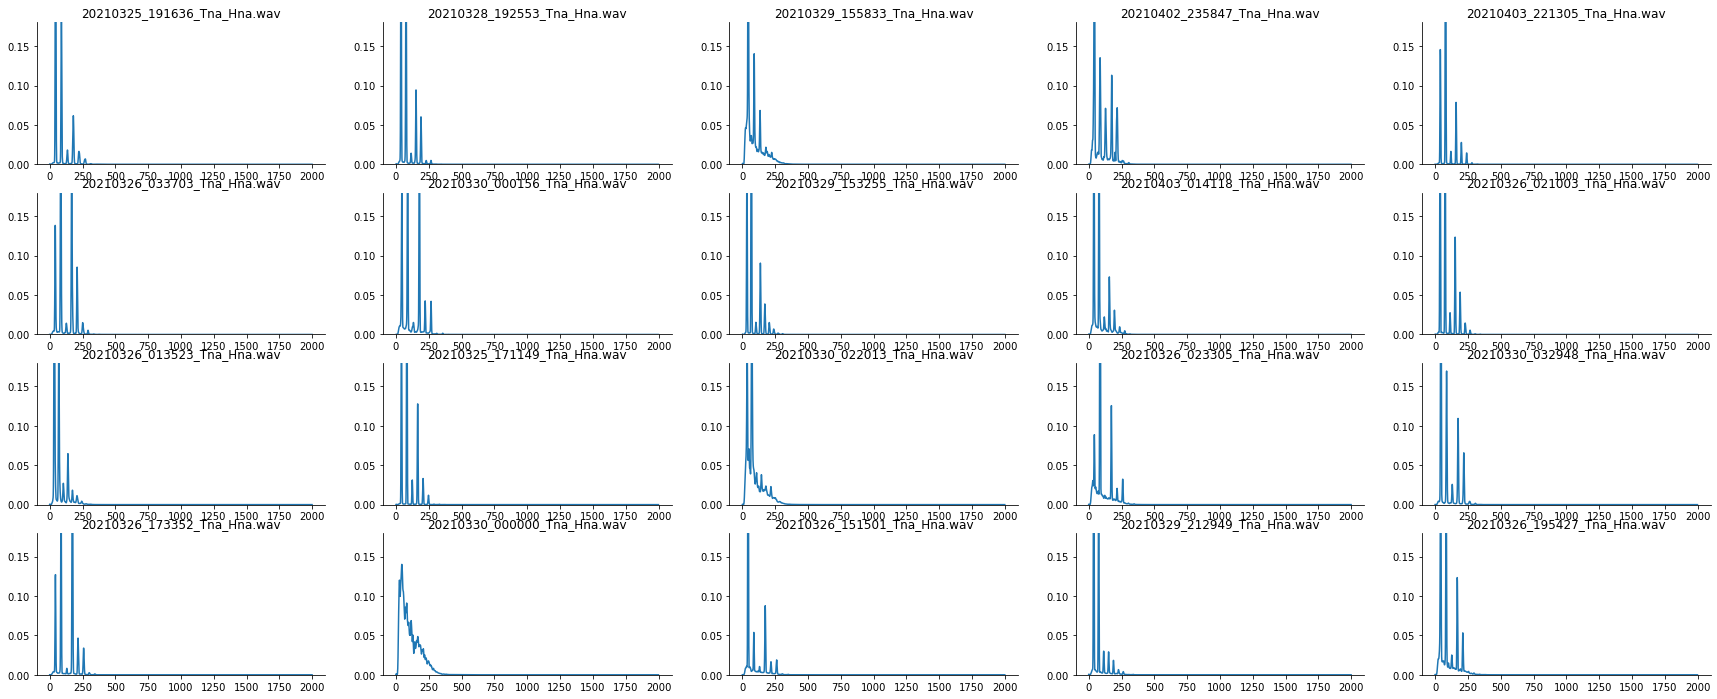

In [31]:
%matplotlib inline
selection = 'score > 10 & score < 19 & max < 0.8 & duration > 10'
df = wbpf.df.query(selection)
wbpf.plot_random_psds(df, noaxis=False)#.sample(len(df),replace=False), noaxis=False)

100%|██████████| 20/20 [00:06<00:00,  3.33it/s]


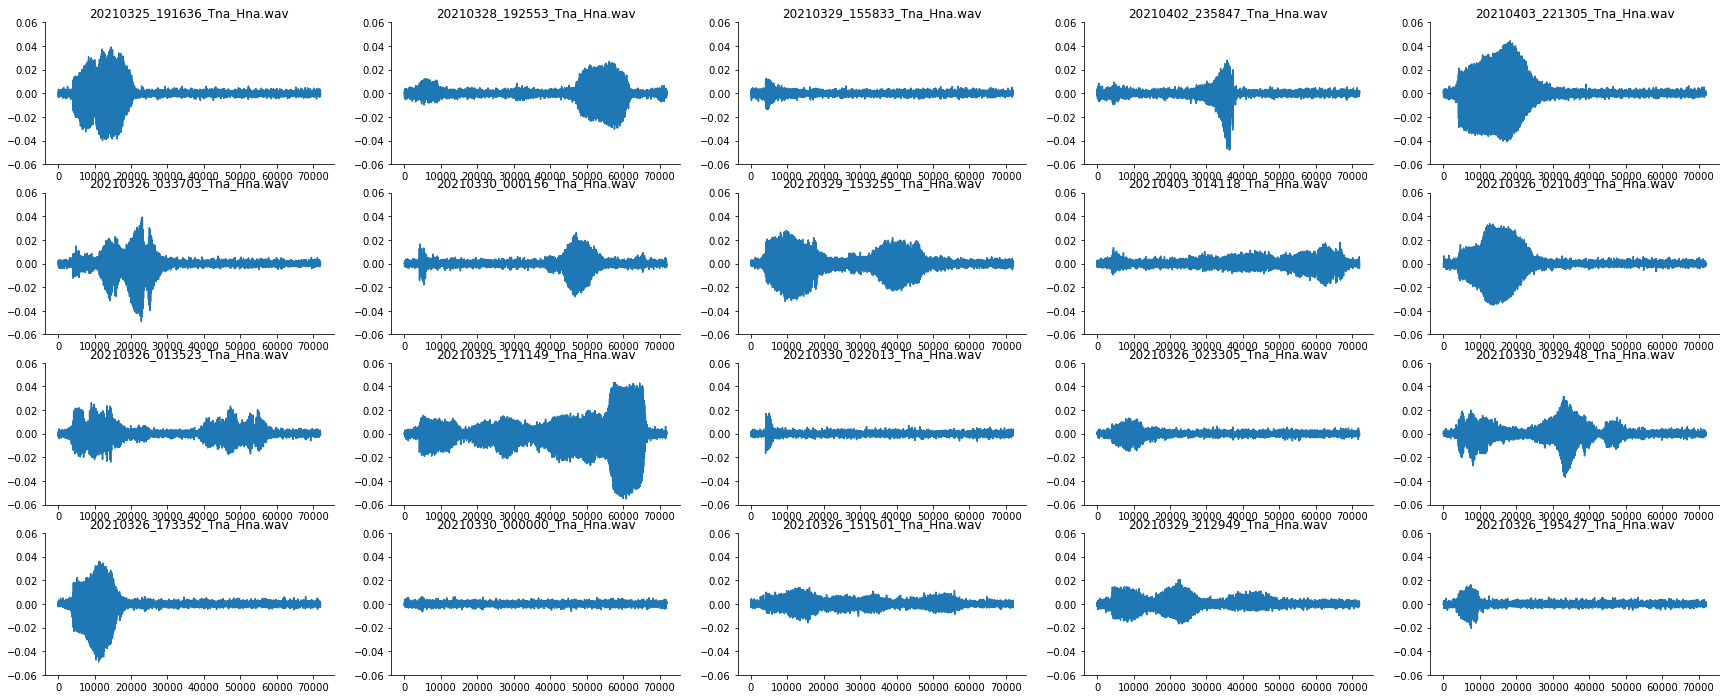

In [32]:
# %matplotlib qt
wbpf.plot_random_wbts(df=df, noaxis=False)#.sample(len(df),replace=False), noaxis=False)

In [13]:
# df

In [14]:
# wbpf.plot_random_stfts(df.sample(len(df),replace=False), noaxis=False)

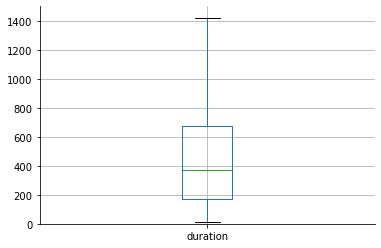

In [25]:
# wbpf.boxplot(df=df.sample(len(df),replace=False), col='duration', ylim=(0,1500));

In [35]:
# copy_files(tmp.x.tolist(), "/home/kalfasyan/Desktop/free_through/free/")

Copying files..: 100%|██████████| 380/380 [00:00<00:00, 506.49it/s]


### Through flight

Found 313 in dataset: /home/kalfasyan/Desktop/free_through/through, and 313 label(s): ['20210227_165505_Tna_Hna.wav' '20210227_165632_Tna_Hna.wav'
 '20210227_171139_Tna_Hna.wav' '20210227_175800_Tna_Hna.wav'
 '20210227_181352_Tna_Hna.wav' '20210227_182913_Tna_Hna.wav'
 '20210227_185251_Tna_Hna.wav' '20210227_192231_Tna_Hna.wav'
 '20210227_210441_Tna_Hna.wav' '20210227_215102_Tna_Hna.wav'
 '20210227_223144_Tna_Hna.wav' '20210227_232259_Tna_Hna.wav'
 '20210227_234337_Tna_Hna.wav' '20210228_001349_Tna_Hna.wav'
 '20210228_002927_Tna_Hna.wav' '20210228_005302_Tna_Hna.wav'
 '20210228_011428_Tna_Hna.wav' '20210228_012628_Tna_Hna.wav'
 '20210228_014625_Tna_Hna.wav' '20210228_020213_Tna_Hna.wav'
 '20210228_021851_Tna_Hna.wav' '20210228_023956_Tna_Hna.wav'
 '20210228_024113_Tna_Hna.wav' '20210228_025723_Tna_Hna.wav'
 '20210228_031949_Tna_Hna.wav' '20210228_034142_Tna_Hna.wav'
 '20210228_050520_Tna_Hna.wav' '20210228_063334_Tna_Hna.wav'
 '20210228_070802_Tna_Hna.wav' '20210228_071405_Tna_Hna.wav'

Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.


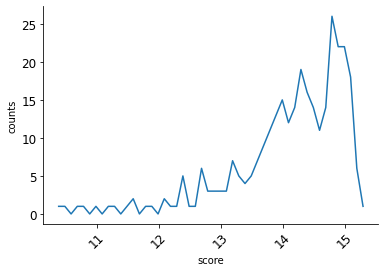

In [15]:
wbpf = WingbeatDatasetProfiler(dsname="/home/kalfasyan/Desktop/free_through/through", rpiformat=True)
np_hist(wbpf.df, 'score')

100%|██████████| 20/20 [00:06<00:00,  3.21it/s]


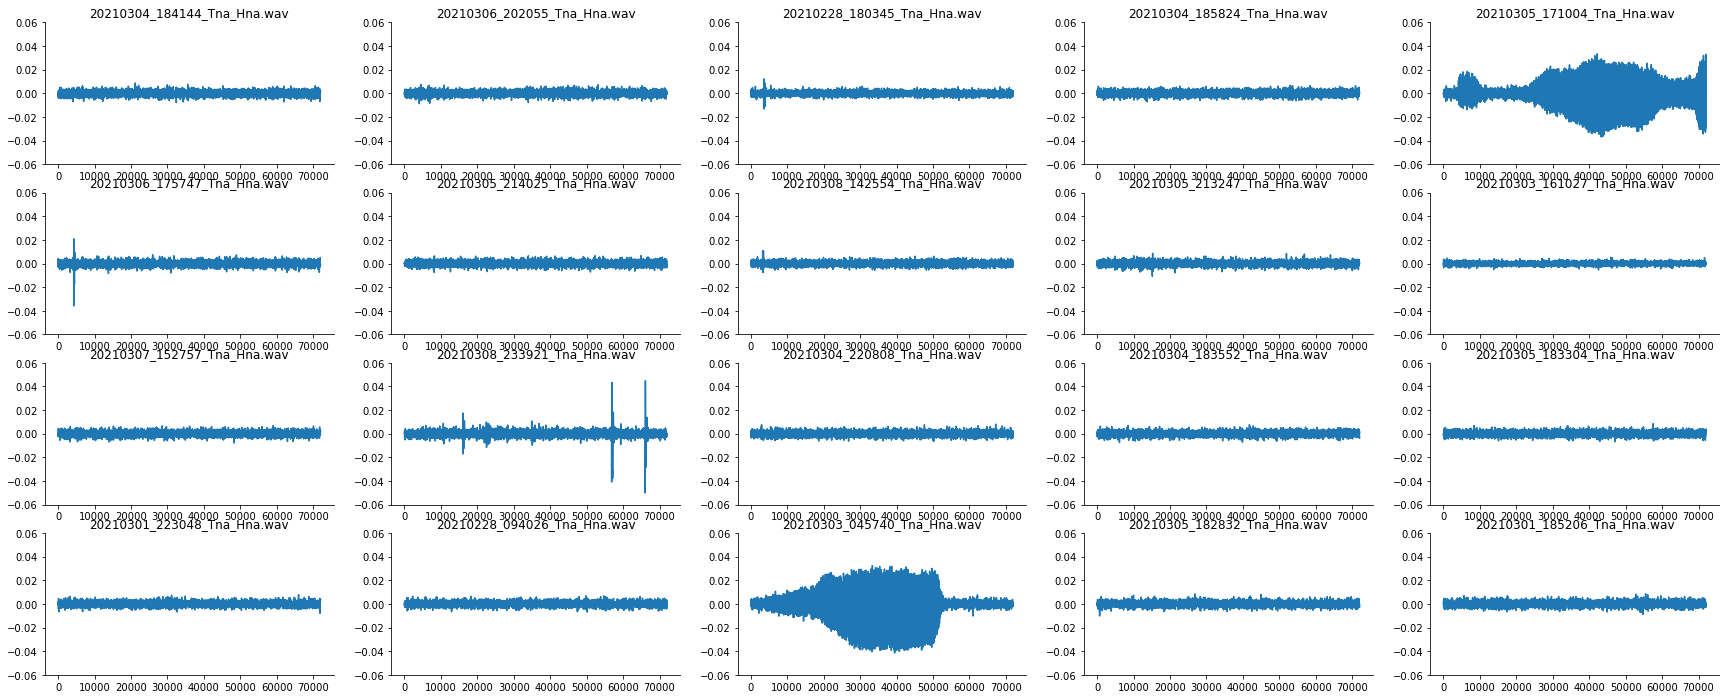

In [16]:
# %matplotlib inline
selection = 'score > 10 & score < 19 & max < 0.8'
df = wbpf.df.query(selection)#.sample(len(df),replace=False)
wbpf.plot_random_wbts(df, noaxis=False)

100%|██████████| 20/20 [00:00<00:00, 56.34it/s]


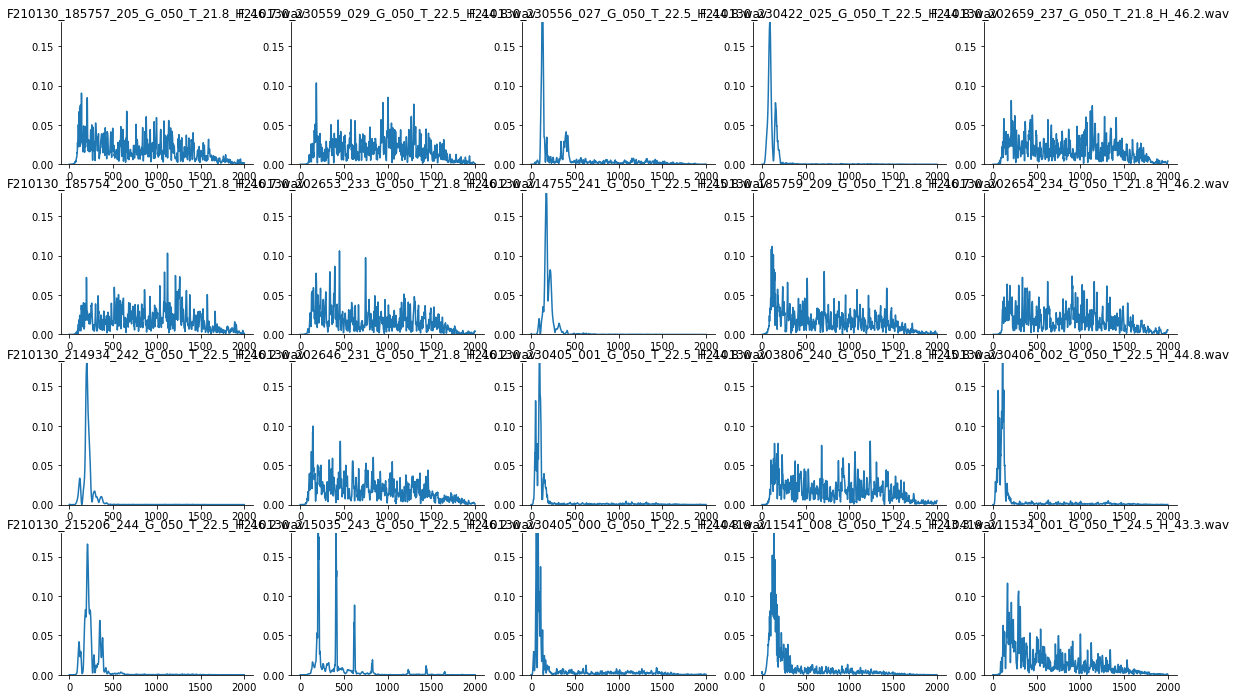

In [29]:
wbpf.plot_random_psds(df=df, noaxis=False)#.sample(len(df),replace=False), noaxis=False)

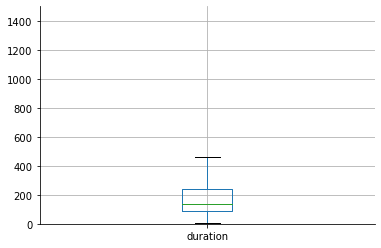

In [38]:
# wbpf.boxplot(df=df, col='duration', ylim=(0,1500));

# Wingbeat sensor SD Card data

#### Freeflight

Found 2907 in dataset: Flytrap/herent, and 1 label(s): ['herent']
Label(s) changed to [1]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.


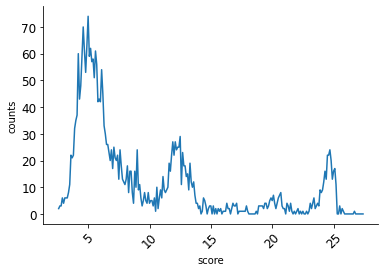

In [16]:
wbpf = WingbeatDatasetProfiler(dsname='Flytrap/herent')
np_hist(wbpf.df, 'score')

 35%|███▌      | 7/20 [00:00<00:00, 64.81it/s]

(684, 12)


100%|██████████| 20/20 [00:00<00:00, 68.89it/s]


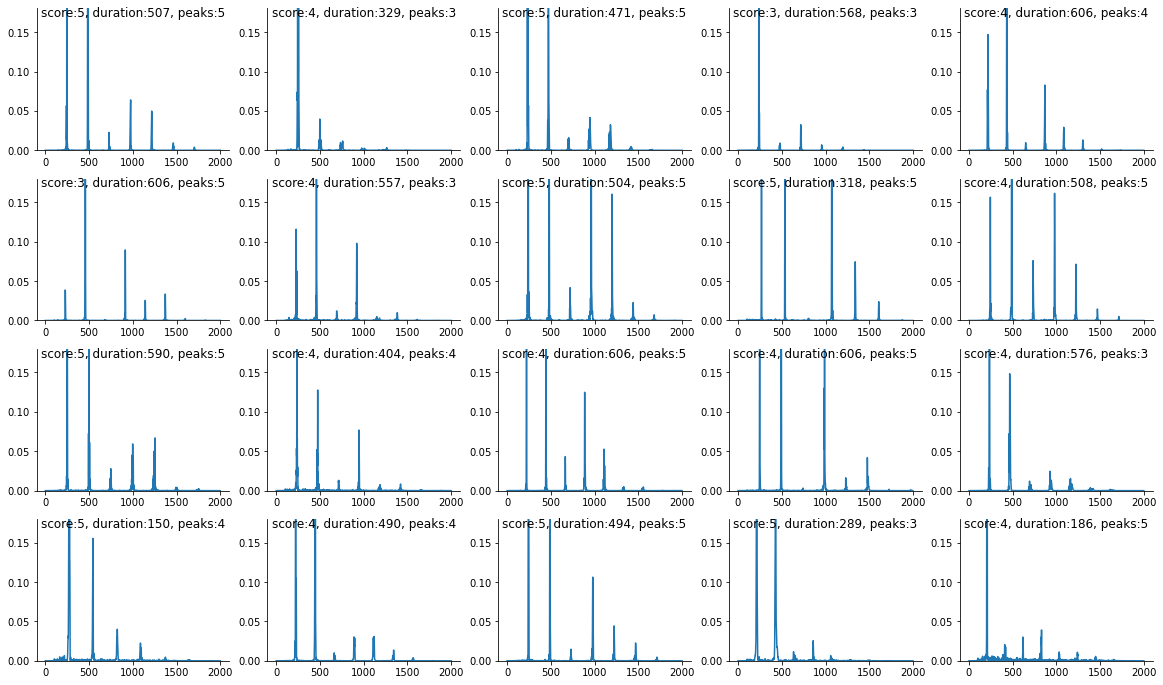

In [21]:
selection = 'peaks>1 & peaks<11 & score>2.5 & score<5' #'score > 2.5 & score < 20 & max < 1. & duration > 10 & peaks < 12'
df = wbpf.df.query(selection)
print(df.shape)
wbpf.plot_random_psds(df.sample(len(df),replace=False), noaxis=False)

In [88]:
# plt.figure(figsize=(18,10))
# for i in tqdm(range(20)):
#     plt.subplot(4,5,i+1)
#     sig = wbpf.psds[df.iloc[i].name][0].squeeze()[:2000]
#     plt.plot(sig.T);
#     score = df.loc[df.iloc[i].name].score
#     duration = df.loc[df.iloc[i].name].duration
#     filename = df.loc[df.iloc[i].name].x.split('/')[-1]
#     plt.title(f"score:{score:.0f}, duration:{duration:.0f}", y=0.9)
#     plt.ylim(0,.9)

In [39]:
from scipy.signal import find_peaks

6


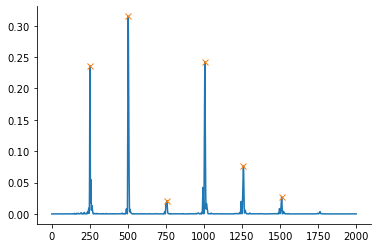

In [79]:
peaks, _ = find_peaks(sig, height=0.02, prominence=0.01, width=3, distance=200)
print(len(peaks))
plt.plot(sig)
plt.plot(peaks,sig[peaks],'x')

(5000,)
(4097,)
4.9720883
(2000, 1)


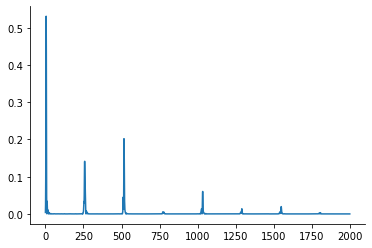

In [134]:
import scipy.signal as sg
from sklearn import preprocessing

rdm = np.random.randint(0, len(wbpf.df))
wbt,rate = open_wingbeat(wbpf.df.x.iloc[rdm], rate=True)
print(wbt.numpy().squeeze().shape)
_, psd = sg.welch(wbt.numpy().squeeze(), fs=rate, scaling='density', window='hanning', nfft=8192, nperseg=4092, noverlap=4092/2)
print(psd.shape)
psd = preprocessing.normalize(psd.reshape(1,-1), norm='l2')
print(psd.sum())
psd = psd.T[:2000]
plt.plot(psd.squeeze().T);
print(psd.shape)

In [57]:
psd.shape

(1, 4097)

100%|██████████| 20/20 [00:00<00:00, 71.66it/s]


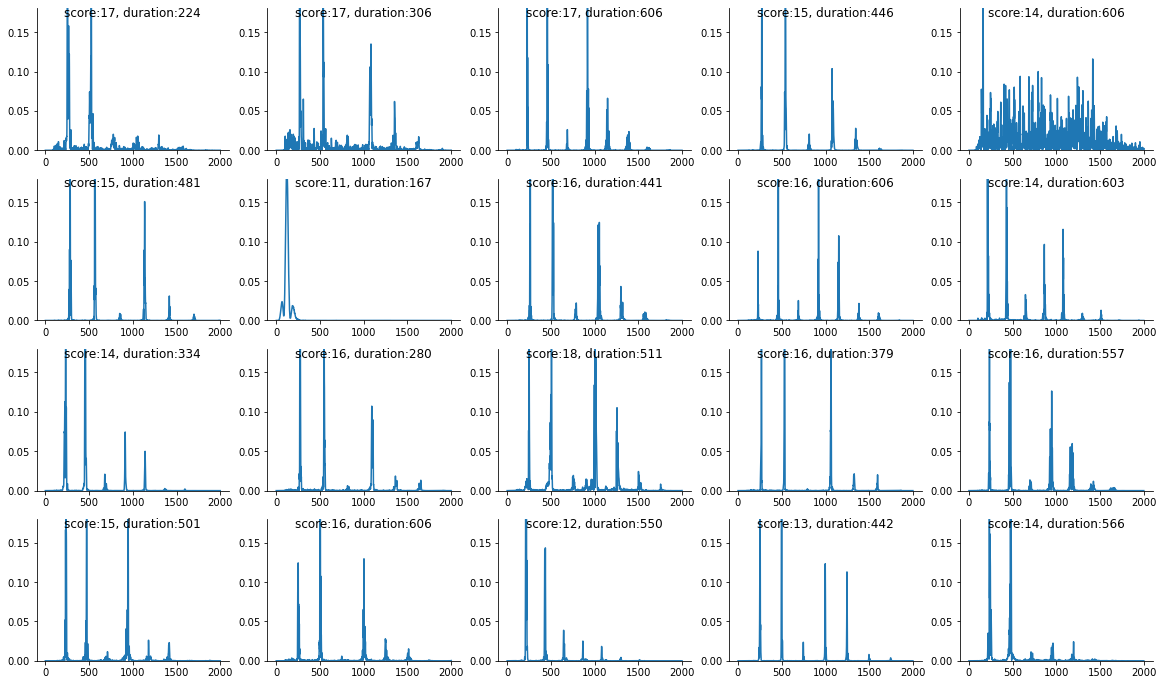

In [9]:
wbpf.plot_random_psds(df.sample(len(df),replace=False), noaxis=False)

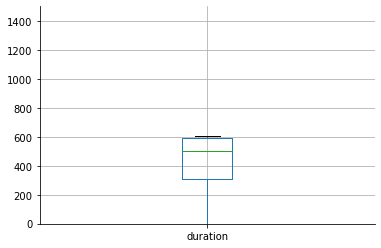

In [43]:
wbpf.boxplot(col='duration', ylim=(-1,1500));

### Through flight

Found 38898 in dataset: Flytrap/pcfruit1, and 1 label(s): ['pcfruit1']
Label(s) changed to [1]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.


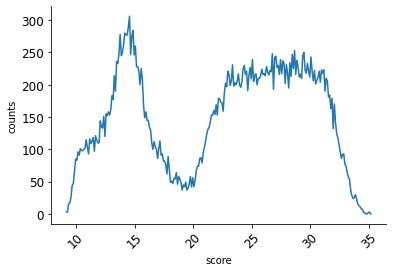

In [44]:
wbpf = WingbeatDatasetProfiler(dsname='Flytrap/pcfruit1')
np_hist(wbpf.df, 'score')

100%|██████████| 20/20 [00:00<00:00, 44.19it/s]


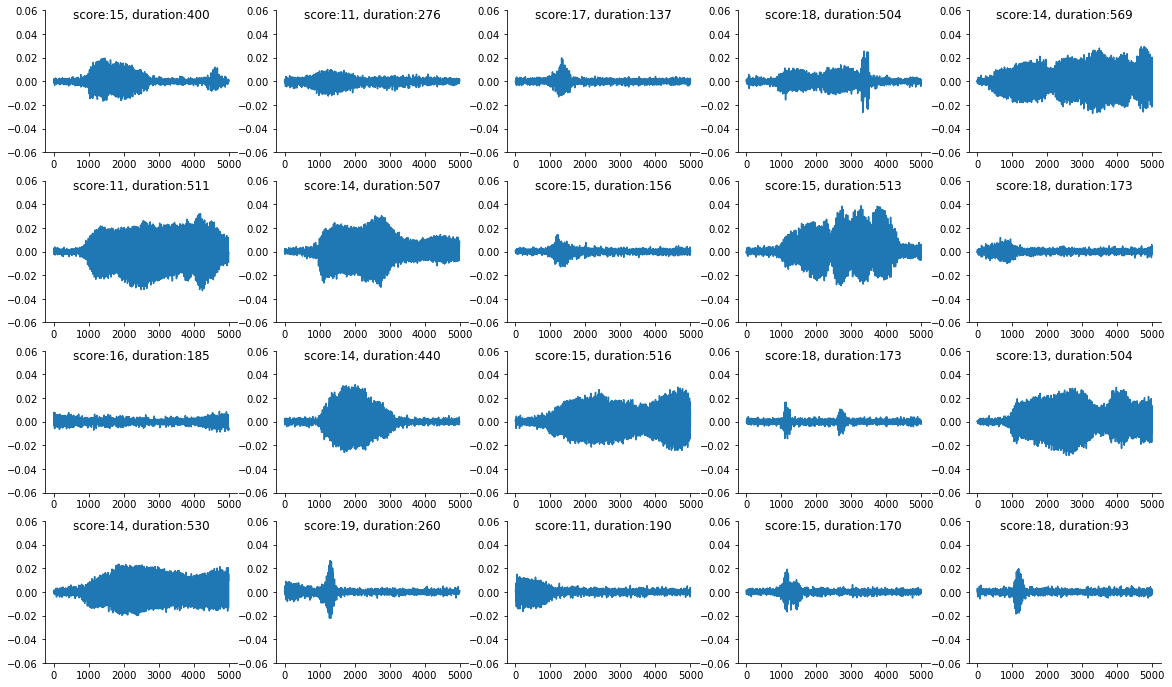

In [45]:
selection = 'score > 10 & score < 19 & max < 0.8 & duration > 10'
df = wbpf.df.query(selection)
wbpf.plot_random_wbts(df.sample(len(df),replace=False), noaxis=False)

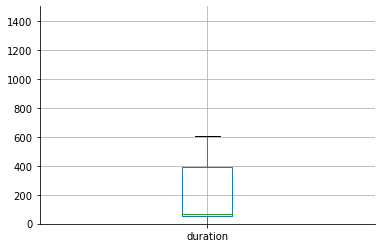

In [46]:
wbpf.boxplot(col='duration', ylim=(-1,1500));